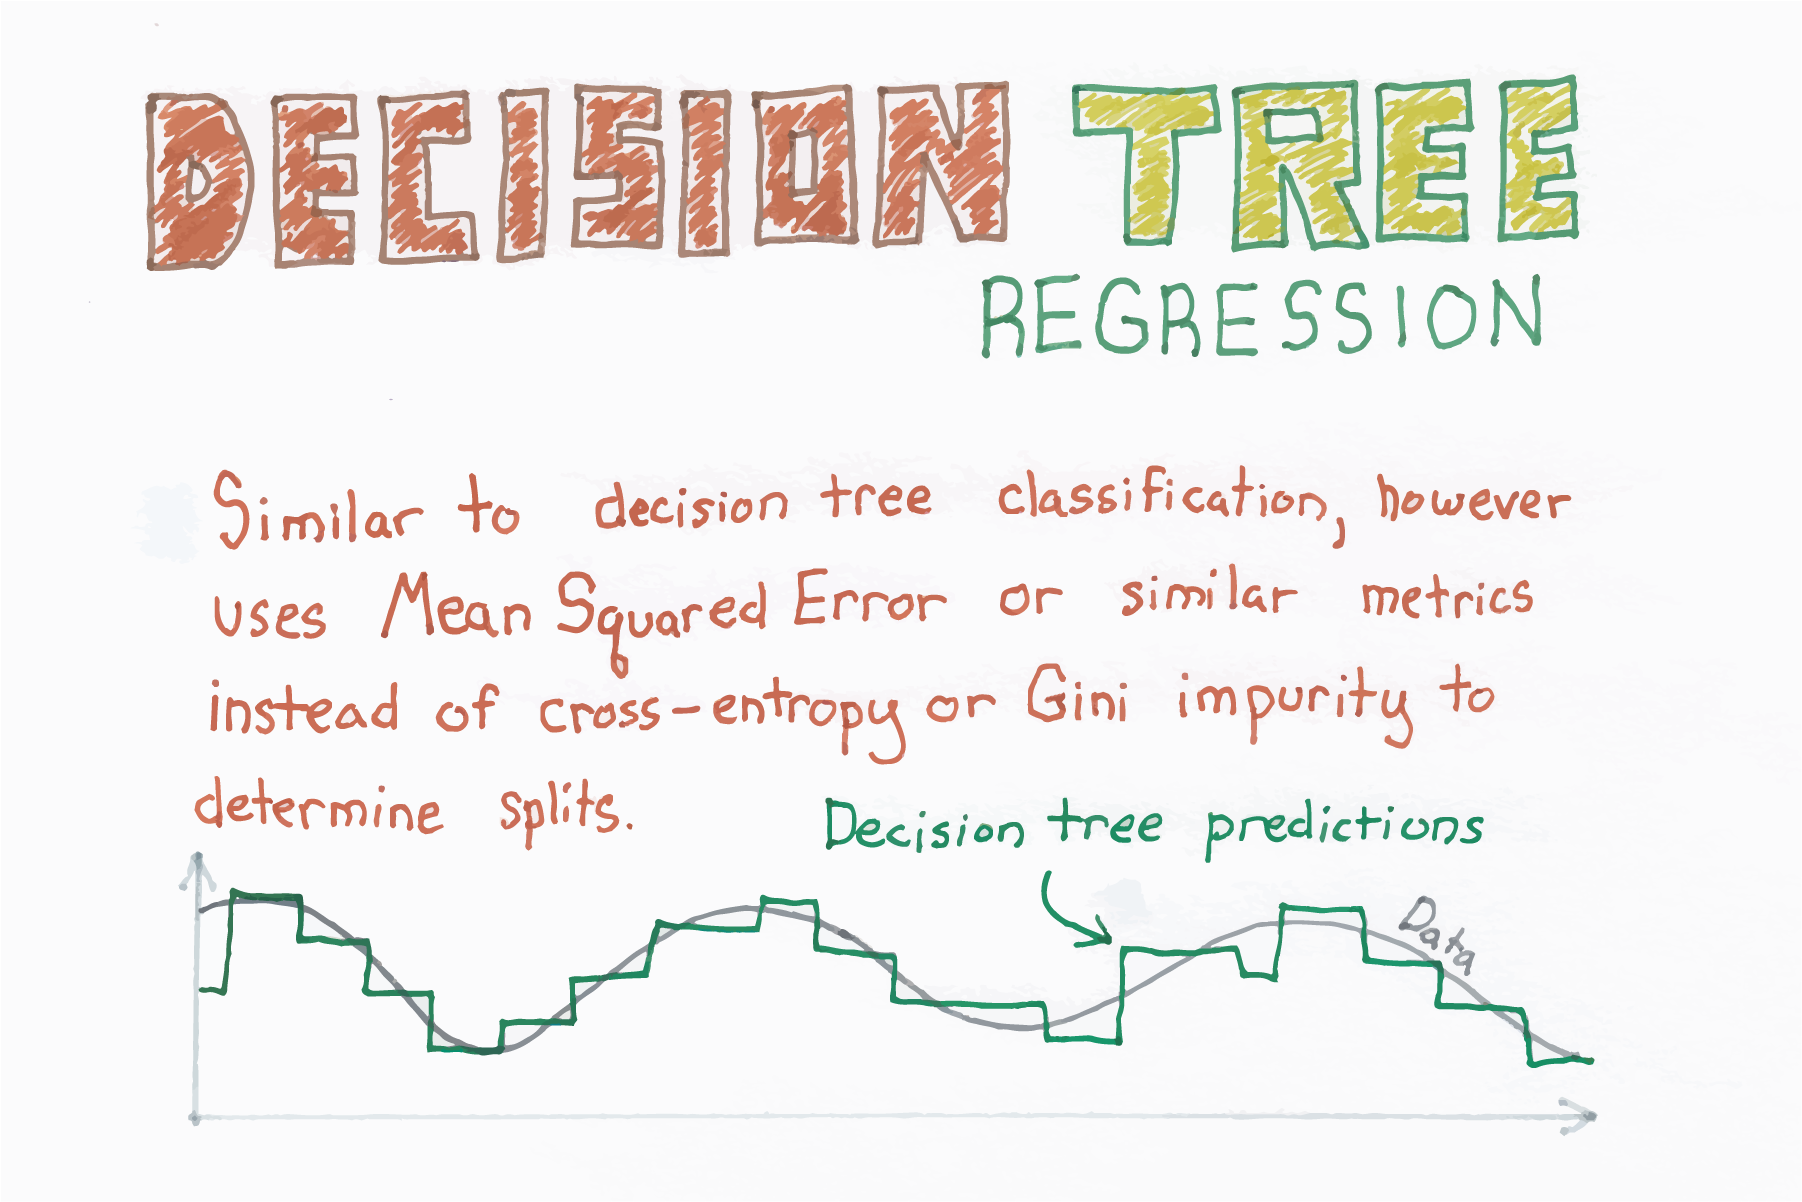

In [32]:
from IPython.display import Image
Image('/home/adish/Downloads/dtreg.png')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/home/adish/Desktop/heightage.csv')
df

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [13]:
x=df.iloc[:,0:1].values# .iloc[:,0]-->depicted as vector  .iloc[:,0:1] --> depicted as matrix
y=df.iloc[:,-1].values
x

array([[10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],
       [78],
       [79],
       [80]])

In [14]:
y

array([138, 138, 138, 139, 139, 139, 140, 140, 140, 141, 141, 141, 142,
       142, 142, 143, 143, 143, 144, 144, 145, 145, 146, 146, 147, 147,
       148, 148, 149, 149, 150, 150, 151, 152, 153, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 175, 178, 180, 183, 185, 188, 190, 193, 195, 199,
       203, 204, 205, 206, 207, 208])

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
xtrain

array([[12],
       [50],
       [21],
       [13],
       [64],
       [55],
       [20],
       [51],
       [59],
       [63],
       [67],
       [42],
       [24],
       [78],
       [29],
       [39],
       [62],
       [45],
       [28],
       [10],
       [25],
       [15],
       [26],
       [30],
       [76],
       [18],
       [23],
       [35],
       [47],
       [27],
       [70],
       [56],
       [73],
       [49],
       [48],
       [11],
       [68],
       [22],
       [71],
       [34],
       [16],
       [33],
       [46],
       [31],
       [19],
       [77],
       [74],
       [57],
       [54]])

In [17]:
from sklearn.tree import DecisionTreeRegressor
dreg=DecisionTreeRegressor(random_state=0)
dreg.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [20]:
xtest

array([[36],
       [37],
       [58],
       [32],
       [40],
       [61],
       [17],
       [69],
       [44],
       [80],
       [66],
       [38],
       [41],
       [52],
       [43],
       [65],
       [79],
       [72],
       [53],
       [14],
       [75],
       [60]])

In [19]:
y_pred=dreg.predict((xtest))
y_pred

array([147., 147., 166., 145., 149., 171., 140., 183., 155., 206., 180.,
       149., 151., 161., 151., 173., 206., 190., 164., 139., 199., 168.])

In [22]:
# model evaluation using Rsquare for decision tree regression
from sklearn import metrics
r_sq=metrics.r2_score(ytest,y_pred)
r_sq

0.9941828370498541

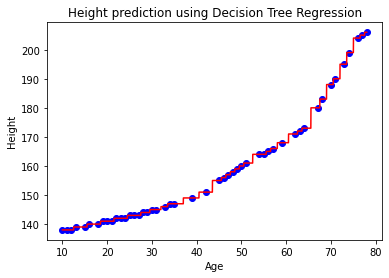

<Figure size 720x72 with 0 Axes>

In [27]:
''' Visualise the Decision Tree Regression by creating range of values from min value of X_train to max value of X_train  
having a difference of 0.01 between two consecutive values'''
#The arange() function is used to get evenly spaced values within a given interval.
xval = np.arange(min(xtrain), max(xtrain), 0.01) 
  
#Reshape the data into a len(xval)*1 array in order to make a column out of the X_val values 
xval = xval.reshape((len(xval), 1))  
  
#Define a scatter plot for training data 
plt.scatter(xtrain, ytrain, color = 'blue') 
  
#Plot the predicted data 
plt.plot(xval, dreg.predict(xval), color = 'red')  
  
#Define the title 
plt.title('Height prediction using Decision Tree Regression')  
  
#Define X axis label 
plt.xlabel('Age') 
  
#Define Y axis label 
plt.ylabel('Height') 

#Set the size of the plot for better clarity
plt.figure(figsize=(10,1))
  
#Draw the plot 
plt.show()

In [29]:
height_pred=dreg.predict([[38]])
height_pred

array([149.])

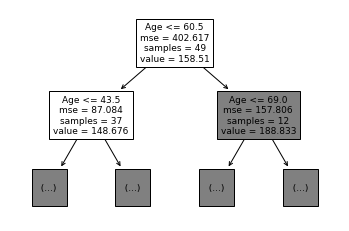

In [31]:
from sklearn import tree
tree.plot_tree(dreg,max_depth=1,fontsize=9,feature_names=['Age', 'Height'],class_names=['no','yes'])
plt.show()